# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
#  Load train dataset 
df_train = pd .read_csv("training_data.csv")
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [3]:
# loading test dataset 
df_test = pd.read_csv("test_data.csv",names=["text"])# we giving column name as text to this column 
df_test

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...
5,Indonesia's volcano eruption leaves 22 dead
6,"Adverts for Air France, Lufthansa and Etihad h..."
7,Maori MP performs haka before swearing oath to...
8,Philippines earthquake: Video shows chaos in s...
9,Wakeskater plunges off Dubai skyscraper pool i...


In [4]:
df_test.head()

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...


# Data cleaning

In [5]:
# seeing unique values in training dataset in label column
df_train["label"].unique()

array([2, 3, 1, 0])

In [6]:
# category mapping(label data ) names to label data values 
category_mapping = {
    0:"World",
    1:"Sports",
    2:"Bussiness",
    3:"Sci/Tech"
}
df_train["label_map"] = df_train["label"].map(category_mapping)
df_train


,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Bussiness
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Bussiness
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Bussiness
4,"Oil prices soar to all-time record, posing new...",2,Bussiness
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,World
119996,Renteria signing a top-shelf deal Red Sox gene...,1,Sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,Sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,Sports


In [7]:
# checking value counts for label_map column
df_train["label_map"].value_counts()

label_map
Bussiness    30000
Sci/Tech     30000
Sports       30000
World        30000
Name: count, dtype: int64

In [8]:
# removing duplicates in rows
unique_values = df_train.drop_duplicates(subset="label_map")
unique_values

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
78,"'Madden,' 'ESPN' Football Score in Different W...",3,Sci/Tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,Sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,World


In [9]:
unique_values

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
78,"'Madden,' 'ESPN' Football Score in Different W...",3,Sci/Tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,Sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,World


In [ ]:
for _,row in unique_values.iterrows():#
  print(f"Topic: {row['label_map']}")#row["label_map"]
  print(f"Headlines:{row['text']}")#row["text"] 
  print("-"*60)#_ symbol is used to dont print index


Topic: Bussiness
Headlines:Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
------------------------------------------------------------
Topic: Sci/Tech
Headlines:'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because "Madden NFL 2005" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it.
------------------------------------------------------------
Topic: Sports
Headlines:Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster tha

# Visulaiazation --> wordcloud and Countplot

In [ ]:
! pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Before giving to wordcloud we do this step to df
news_text =" ".join(df_train["text"].astype(str))

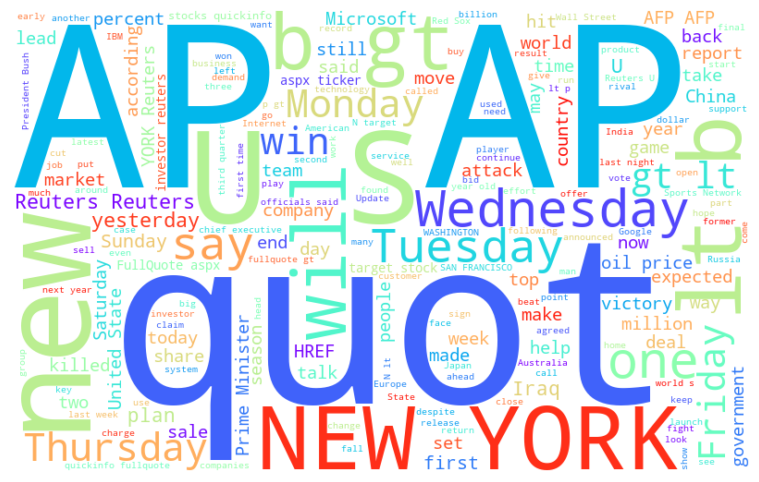

In [ ]:
# Wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 800,
    height = 500,
    background_color="white",
    stopwords = None,
    colormap="rainbow"
).generate(news_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

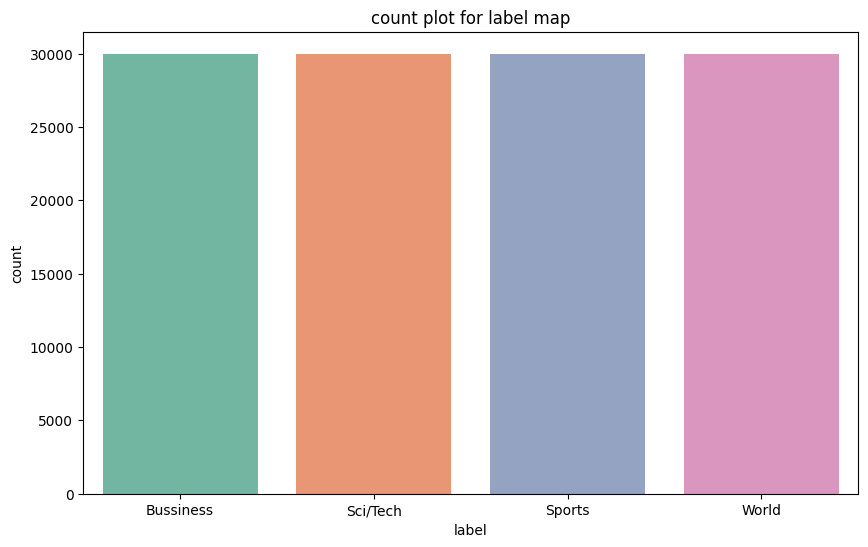

In [15]:
# ploting countplot for label map column (count map shows how many numbers in each in label_map)
plt.figure(figsize=(10,6))
sns.countplot(x='label_map',data=df_train,palette='Set2')
plt.title("count plot for label map")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

# text cleaning

In [16]:
# removing unwanted symbols and etc in text 
import re , string#re என்றால் regular expression library.இது text-ல இருந்து word, number, symbol remove பண்ண அல்லது pattern கண்டுபிடிக்க உதவும்.
def clean_text(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text= re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [17]:
df_train[["text"]]

,text
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."
...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...
119996,Renteria signing a top-shelf deal Red Sox gene...
119997,Saban not going to Dolphins yet The Miami Dolp...
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [18]:
# cleaning text in train dataset
df_train["text"]=df_train["text"].apply(clean_text)# appling  clean_text to df_train textcolumn உன் dataset-ல் "text" column-இல் உள்ள வாக்கியங்களில் இருக்கும் unwanted symbols, emojis, punctuation marks, extra spaces, numbers, URLs, போன்றவற்றை நீக்கி
df_train

,text,label,label_map
0,wall st bears claw back into the black reuters...,2,Bussiness
1,carlyle looks toward commercial aerospace reut...,2,Bussiness
2,oil and economy cloud stocks outlook reuters r...,2,Bussiness
3,iraq halts oil exports from main southern pipe...,2,Bussiness
4,oil prices soar to alltime record posing new m...,2,Bussiness
...,...,...,...
119995,pakistans musharraf says wont quit as army chi...,0,World
119996,renteria signing a topshelf deal red sox gener...,1,Sports
119997,saban not going to dolphins yet the miami dolp...,1,Sports
119998,todays nfl games pittsburgh at ny giants time ...,1,Sports


#  word tokenize

In [ ]:
# Tokenization --> df_train["text"] 
import nltk #nltk →  natuiral language toolkit 
nltk.download('punkt_tab') #nltk
from nltk import word_tokenize #word_tokenize()  
df_train["text"] = df_train["text"].apply(word_tokenize) #apply() → DataFrame-

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,label_map
0,"[wall, st, bears, claw, back, into, the, black...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, and, economy, cloud, stocks, outlook, re...",2,Bussiness
3,"[iraq, halts, oil, exports, from, main, southe...",2,Bussiness
4,"[oil, prices, soar, to, alltime, record, posin...",2,Bussiness


# stopwords  removal


In [20]:
! pip install nltk
# it has no significant meaning.can remove from data ## example: the,is,in,a,on this all removed in data


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stop_words(text):#text → ஒரு list of words, : ["this", "is", "a", "good", "day"]words → 
    stop_words=set(stopwords.words("english"))#stopwords.words("english") 
    text=[words for words in text if words not in stop_words]
    return text


In [23]:
df_train["text"] = df_train["text"].apply(stop_words)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Bussiness
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Bussiness
4,"[oil, prices, soar, alltime, record, posing, n...",2,Bussiness


In [24]:
df_train

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Bussiness
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Bussiness
4,"[oil, prices, soar, alltime, record, posing, n...",2,Bussiness
...,...,...,...
119995,"[pakistans, musharraf, says, wont, quit, army,...",0,World
119996,"[renteria, signing, topshelf, deal, red, sox, ...",1,Sports
119997,"[saban, going, dolphins, yet, miami, dolphins,...",1,Sports
119998,"[todays, nfl, games, pittsburgh, ny, giants, t...",1,Sports


# Lemmentization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemma(text):
  lemma_stem =WordNetLemmatizer()
  text = " ".join(lemma_stem.lemmatize(words) for words in text)
  return text

In [27]:
df_train["text"] = df_train["text"].apply(lemma)
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Bussiness
1,carlyle look toward commercial aerospace reute...,2,Bussiness
2,oil economy cloud stock outlook reuters reuter...,2,Bussiness
3,iraq halt oil export main southern pipeline re...,2,Bussiness
4,oil price soar alltime record posing new menac...,2,Bussiness


# Vectorization

In [28]:
x = df_train["text"]
y = df_train["label"]

In [29]:
x

0         wall st bear claw back black reuters reuters s...
1         carlyle look toward commercial aerospace reute...
2         oil economy cloud stock outlook reuters reuter...
3         iraq halt oil export main southern pipeline re...
4         oil price soar alltime record posing new menac...
                                ...                        
119995    pakistan musharraf say wont quit army chief ka...
119996    renteria signing topshelf deal red sox general...
119997    saban going dolphin yet miami dolphin put cour...
119998    today nfl game pittsburgh ny giant time pm lin...
119999    net get carter raptor indianapolis allstar vin...
Name: text, Length: 120000, dtype: object

In [30]:
y

0         2
1         2
2         2
3         2
4         2
         ..
119995    0
119996    1
119997    1
119998    1
119999    1
Name: label, Length: 120000, dtype: int64

In [31]:
# Splitting dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
x_train

84145     bill mcgahee hit pause run fast forward wind g...
60838     eli lilly eliminating job indianapolisbased dr...
99429     crime top queen speech agenda new measure figh...
26258     bloomberg face payoff year school plan new yor...
12165     timeline case kobe bryant ap ap timeline sexua...
                                ...                        
110268    genome fowl researcher sequenced genome red ju...
119879    governor want fine selling violent game kid il...
103694    russian finish dominant federation cup victory...
860       oracle ready crm update oracle corp plan relea...
15795     apple new imac display apple computer quote ch...
Name: text, Length: 90000, dtype: object

In [33]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (90000,)
x_test: (30000,)


In [ ]:
# Vectorization — (Text → Numbers)  
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# saving vectorized pkl

In [35]:
import pickle
# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Model building

# Randomforestclassifier 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1)
rf.fit(x_train_tfidf,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
# Pediction on test data
y_pred_rf=rf.predict(x_test_tfidf)
y_pred_rf

array([2, 2, 1, ..., 2, 1, 3], shape=(30000,))

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Confusion Matrix:\n", cm_rf)
train_score = rf.score(x_train_tfidf, y_train)
test_score = rf.score(x_test_tfidf, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Confusion Matrix:
 [[6664  290  323  195]
 [ 104 7336   66   54]
 [ 294  114 6346  686]
 [ 317  176  693 6342]]
Train Score: 0.9995111111111111
Test Score: 0.8896


In [39]:
# Dataframing
rf_results = pd.DataFrame({
    "Model": ["RandomForestClassifier"],
    "Accuracy": [acc_rf],
    "Precision(avg)": [report_rf["weighted avg"]["precision"]],
    "Recall(avg)": [report_rf["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_rf["weighted avg"]["f1-score"]]
})
rf_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,RandomForestClassifier,0.8896,0.889036,0.8896,0.889121


# Navie bias

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [41]:
# Prediction on test dataset
y_pred_nb = nb.predict(x_test_tfidf)
y_pred_nb 

array([2, 2, 1, ..., 2, 1, 0], shape=(30000,))

In [42]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
 [[6689  275  353  155]
 [  83 7402   44   31]
 [ 240   73 6529  598]
 [ 301   63  638 6526]]


In [43]:
nb_results = pd.DataFrame({
    "Model": ["MultinomialNB"],
    "Accuracy": [acc_nb],
    "Precision(avg)": [report_nb["weighted avg"]["precision"]],
    "Recall(avg)": [report_nb["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_nb["weighted avg"]["f1-score"]]
})
nb_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,MultinomialNB,0.904867,0.904644,0.904867,0.904601


# XGBclassifier

In [44]:
# model training
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model_xgb.fit(x_train_tfidf, y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [45]:
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Bussiness
1,carlyle look toward commercial aerospace reute...,2,Bussiness
2,oil economy cloud stock outlook reuters reuter...,2,Bussiness
3,iraq halt oil export main southern pipeline re...,2,Bussiness
4,oil price soar alltime record posing new menac...,2,Bussiness


In [46]:
# prediction on test dataset
y_pred_xgb = model_xgb.predict(x_test_tfidf)
y_pred_xgb

array([2, 2, 1, ..., 2, 1, 3], shape=(30000,))

In [47]:
# evatuation 
acc_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
print(" Confusion Matrix:\n", cm_xgb)

 Confusion Matrix:
 [[6600  308  298  266]
 [ 120 7199   95  146]
 [ 266   95 6410  669]
 [ 278  185  640 6425]]


In [48]:
# Store in DataFrame (like RandomForest format)
xgb_results = pd.DataFrame({
    "Model": ["XGBoostClassifier"],
    "Accuracy": [acc_xgb],
    "Precision(avg)": [report_xgb["weighted avg"]["precision"]],
    "Recall(avg)": [report_xgb["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_xgb["weighted avg"]["f1-score"]]
})
xgb_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,XGBoostClassifier,0.8878,0.887646,0.8878,0.887626


# LSTM

In [49]:
# splitting dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 2, random_state = 10)

In [50]:
# Tokeization
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(xtrain)
sequences = tokenizer.texts_to_sequences(xtrain)

In [51]:
# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, padding='post', maxlen=10)

In [52]:
# model building
model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=10),
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(10, 5)),  
    LSTM(30, activation='tanh'), 
    Dense(10, activation='sigmoid')  
])
model.compile(optimizer= 'adam',
               loss='binary_crossentropy',
               metrics=['accuracy', 'mae'])

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Labelencoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_e = label_encoder.transform(ytrain)
y_test_e = label_encoder.transform(ytest)

In [55]:
y_train_encoded = to_categorical(y_train_e, num_classes=10)

In [56]:
history = model.fit(padded_sequences, 
                    y_train_encoded,
                    epochs=5)


Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.6926 - loss: 0.1350 - mae: 0.0870
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.7909 - loss: 0.1003 - mae: 0.0602
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.7963 - loss: 0.0974 - mae: 0.0583
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8003 - loss: 0.0950 - mae: 0.0568
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8056 - loss: 0.0927 - mae: 0.0555


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20 non-null     object
dtypes: object(1)
memory usage: 292.0+ bytes


In [58]:
# Convert test texts to sequences
X_test_seq = tokenizer.texts_to_sequences(xtest)

# Pad the sequences to match input length used in training
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=10)

# Prediction on the entire test data
y_pred_probs = model.predict(X_test_pad)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute metrics
acc_lstm = accuracy_score(y_test_e, y_pred_classes)
cm_lstm = confusion_matrix(y_test_e, y_pred_classes)
report_lstm = classification_report(y_test_e, y_pred_classes, output_dict=True)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


In [59]:
# Save neatly in DataFrame
lstm_results = pd.DataFrame({
    "Model": ["LSTM"],
    "Accuracy": [acc_lstm],
    "Precision(avg)": [report_lstm["weighted avg"]["precision"]],
    "Recall(avg)": [report_lstm["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_lstm["weighted avg"]["f1-score"]]
})

# Display results
print("\n LSTM Model Performance:")
a =pd.DataFrame(lstm_results)
a


 LSTM Model Performance:


,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,LSTM,0.5,0.5,0.5,0.5


In [60]:
# Concating
best_model_df = pd.concat([rf_results,nb_results,xgb_results,a], ignore_index=True)
best_model_df

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,RandomForestClassifier,0.889600,0.889036,0.889600,0.889121
1,MultinomialNB,0.904867,0.904644,0.904867,0.904601
2,XGBoostClassifier,0.887800,0.887646,0.887800,0.887626
3,LSTM,0.500000,0.500000,0.500000,0.500000


# storing to file path

In [61]:
import os 
os.getcwd()

'c:\\Users\\Santhosh\\OneDrive\\Desktop\\python_class\\deeplearning\\Project4'

In [62]:
path = r"C:\Users\Santhosh\OneDrive\Desktop\python_class\deeplearning\archive (8)\best_model.csv"
best_model_df.to_csv("best_model.csv", index=False)

In [63]:
# Find index of the best model based on Accuracy
best_index = best_model_df['Accuracy'].idxmax()
# Take that best model row
best_model = best_model_df.loc[best_index]
# Show best model details
print("\nBest model with highest Accuracy:")
print(best_model)



Best model with highest Accuracy:
Model             MultinomialNB
Accuracy               0.904867
Precision(avg)         0.904644
Recall(avg)            0.904867
F1-Score(avg)          0.904601
Name: 1, dtype: object


# Hyperparameter tunning-->(RandomizedSearchCV)

In [64]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}
grid_nb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=param_grid_nb,
    n_iter=10,        # number of random combinations
    cv=5,             # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [66]:
# Best hyperparameters
# Now this will work
print("Best Parameters:", grid_nb.best_params_)
print("Best Score:", grid_nb.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# Get the best Naive Bayes model
best_nb_model = grid_nb.best_estimator_
best_nb_model


,alpha,0.1
,force_alpha,True
,fit_prior,False
,class_prior,None


# remodel building

In [ ]:
# MultinomialNB
final_nb_model = MultinomialNB(
    alpha=0.1,
    fit_prior=False
)

In [ ]:
final_nb_model.fit(x_train_tfidf, y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,False
,class_prior,None


In [ ]:
# Predict on test data
y_pred_final = final_nb_model.predict(x_test_tfidf)

In [ ]:
# Evaluate
acc_final = accuracy_score(y_test, y_pred_final)
cm_final = confusion_matrix(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)
print("accuracy_score:\n", acc_final)
print("confusion_matrix:\n", cm_final)
print("classification_repor:\n", report_final)
# Correct scoring using TF-IDF features
print(f"Train Score: {final_nb_model.score(x_train_tfidf, y_train)}")
print(f"Test Score: {final_nb_model.score(x_test_tfidf, y_test)}")

accuracy_score:
 0.9062666666666667
confusion_matrix:
 [[6677  268  356  171]
 [  74 7412   41   33]
 [ 246   68 6489  637]
 [ 261   52  605 6610]]
classification_repor:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      7472
           1       0.95      0.98      0.97      7560
           2       0.87      0.87      0.87      7440
           3       0.89      0.88      0.88      7528

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000

Train Score: 0.9350777777777778
Test Score: 0.9062666666666667


In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate
acc_final = accuracy_score(y_test, y_pred_final)
cm_final = confusion_matrix(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final, output_dict=True)  # <-- important

# Store in DataFrame
nb_results_tuned = pd.DataFrame({
    "Model": ["Tuned MultinomialNB"],
    "Accuracy": [acc_final],
    "Precision(avg)": [report_final["weighted avg"]["precision"]],
    "Recall(avg)": [report_final["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_final["weighted avg"]["f1-score"]]
})


b = pd.DataFrame(nb_results_tuned)
b

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,Tuned MultinomialNB,0.906267,0.906031,0.906267,0.906034


In [ ]:
# Merge all model results
best_model_df = pd.concat([rf_results, nb_results_tuned, xgb_results, lstm_results], ignore_index=True)
# Display
print(best_model_df)
# Find the best model based on Accuracy
best_index = best_model_df['Accuracy'].idxmax()
best_model = best_model_df.loc[best_index]
print("\nBest model overall:")
print(best_model)


                    Model  Accuracy  Precision(avg)  Recall(avg)  \
0  RandomForestClassifier  0.889600        0.889036     0.889600   
1     Tuned MultinomialNB  0.906267        0.906031     0.906267   
2       XGBoostClassifier  0.887800        0.887646     0.887800   
3                    LSTM  0.500000        0.500000     0.500000   

   F1-Score(avg)  
0       0.889121  
1       0.906034  
2       0.887626  
3       0.500000  

Best model overall:
Model             Tuned MultinomialNB
Accuracy                     0.906267
Precision(avg)               0.906031
Recall(avg)                  0.906267
F1-Score(avg)                0.906034
Name: 1, dtype: object


# saving final_nb_model as pkl

In [ ]:

import pickle
# model save
with open("nb_model.pkl","wb") as file:
  pickle.dump(final_nb_model,file)

# saving tfidf as pkl

In [ ]:
# vector save
with open("tfidf.pkl","wb") as file:
  pickle.dump(tfidf,file)

# Reading nb_model pkl 

In [ ]:
with open("nb_model.pkl","rb") as file:
  model = pickle.load(file)

# Reading tfidf pkl 

In [ ]:
with open("tfidf.pkl","rb") as file:
  vector = pickle.load(file)

# Text prediction finally

In [ ]:
text = ["Apple launches new iPhone with advanced features"]
new_text_tfidf = vector.transform(text)
prediction = model.predict(new_text_tfidf)

In [ ]:
if prediction[0]==0:
  print("It is world news")
elif prediction[0]==1:
  print("It is sports news")
elif prediction[0]==2:
  print("It is business news")
else:
  print("It is science and technology news")

It is science and technology news


# new prediction test Dataset 

In [ ]:
test_data = vector.transform(df_test["text"])
pred = model.predict(test_data)

In [ ]:
df_test["label"] = pred
df_test.head()

,text,label
0,Three quarters of financial firms still conduc...,3
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2
3,Why food discount stickers may be a thing of t...,2
4,German cabinet tries to solve ‘no-debt’ crisis...,0


In [ ]:
# save model in csv
df_test.to_csv("test_data_prediction.csv",index=False)

In [ ]:
category_mapping = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}
df_test["category"] = df_test["label"].map(category_mapping)
df_test.to_csv("test_data_prediction_final.csv", index=False)
df_test.head()


,text,label,category
0,Three quarters of financial firms still conduc...,3,Sci/Tech
1,European stocks rally on hope ECB may be done ...,2,Business
2,"Gold prices have hit a new high, while the val...",2,Business
3,Why food discount stickers may be a thing of t...,2,Business
4,German cabinet tries to solve ‘no-debt’ crisis...,0,World


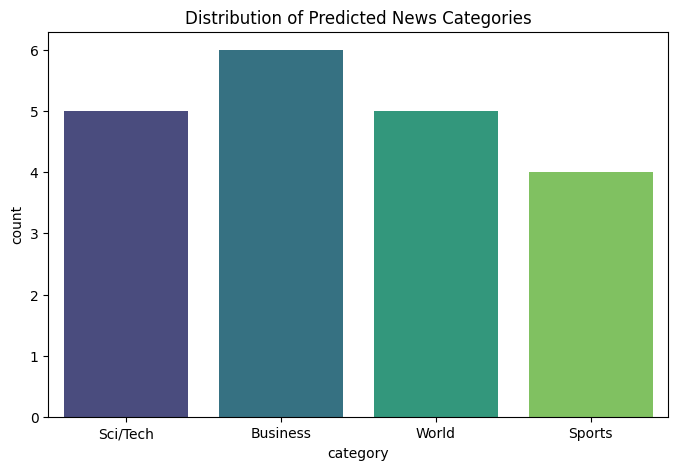

In [ ]:
# Countplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x="category", data=df_test, palette="viridis")
plt.title("Distribution of Predicted News Categories")
plt.show()


# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset

In [ ]:
#  Load train dataset 
df_train = pd .read_csv("training_data.csv")
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [ ]:
# loading test dataset 
df_test = pd.read_csv("test_data.csv",names=["text"])# we giving column name as text to this column 
df_test

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...
5,Indonesia's volcano eruption leaves 22 dead
6,"Adverts for Air France, Lufthansa and Etihad h..."
7,Maori MP performs haka before swearing oath to...
8,Philippines earthquake: Video shows chaos in s...
9,Wakeskater plunges off Dubai skyscraper pool i...


In [ ]:
df_test.head()

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...


# Data cleaning

In [ ]:
# seeing unique values in training dataset in label column
df_train["label"].unique()

array([2, 3, 1, 0])

In [ ]:
# category mapping(label data ) names to label data values 
category_mapping = {
    0:"World",
    1:"Sports",
    2:"Bussiness",
    3:"Sci/Tech"
}
df_train["label_map"] = df_train["label"].map(category_mapping)
df_train


,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Bussiness
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Bussiness
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Bussiness
4,"Oil prices soar to all-time record, posing new...",2,Bussiness
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,World
119996,Renteria signing a top-shelf deal Red Sox gene...,1,Sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,Sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,Sports


In [ ]:
# checking value counts for label_map column
df_train["label_map"].value_counts()

label_map
Bussiness    30000
Sci/Tech     30000
Sports       30000
World        30000
Name: count, dtype: int64

In [ ]:
# removing duplicates in rows
unique_values = df_train.drop_duplicates(subset="label_map")
unique_values

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
78,"'Madden,' 'ESPN' Football Score in Different W...",3,Sci/Tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,Sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,World


In [ ]:
unique_values

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
78,"'Madden,' 'ESPN' Football Score in Different W...",3,Sci/Tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,Sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,World


In [ ]:
for _,row in unique_values.iterrows():#
  print(f"Topic: {row['label_map']}")#row["label_map"]
  print(f"Headlines:{row['text']}")#row["text"] 
  print("-"*60)#_ symbol is used to dont print index


Topic: Bussiness
Headlines:Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
------------------------------------------------------------
Topic: Sci/Tech
Headlines:'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because "Madden NFL 2005" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it.
------------------------------------------------------------
Topic: Sports
Headlines:Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster tha

# Visulaiazation --> wordcloud and Countplot

In [ ]:
! pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Before giving to wordcloud we do this step to df
news_text =" ".join(df_train["text"].astype(str))

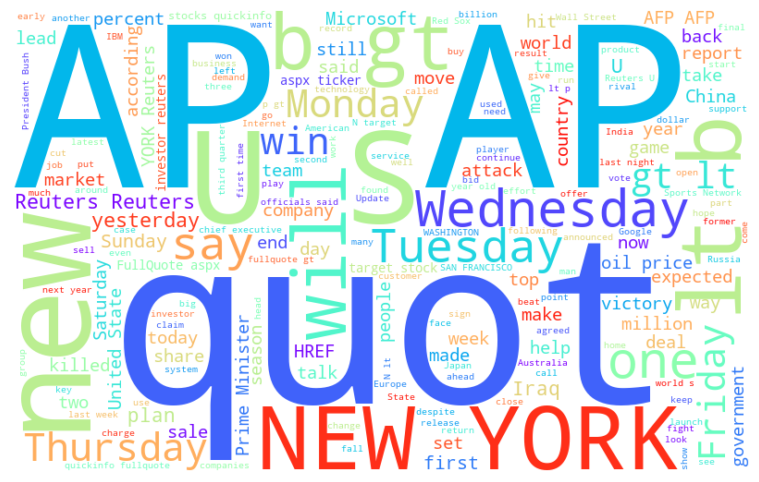

In [ ]:
# Wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(
    width = 800,
    height = 500,
    background_color="white",
    stopwords = None,
    colormap="rainbow"
).generate(news_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

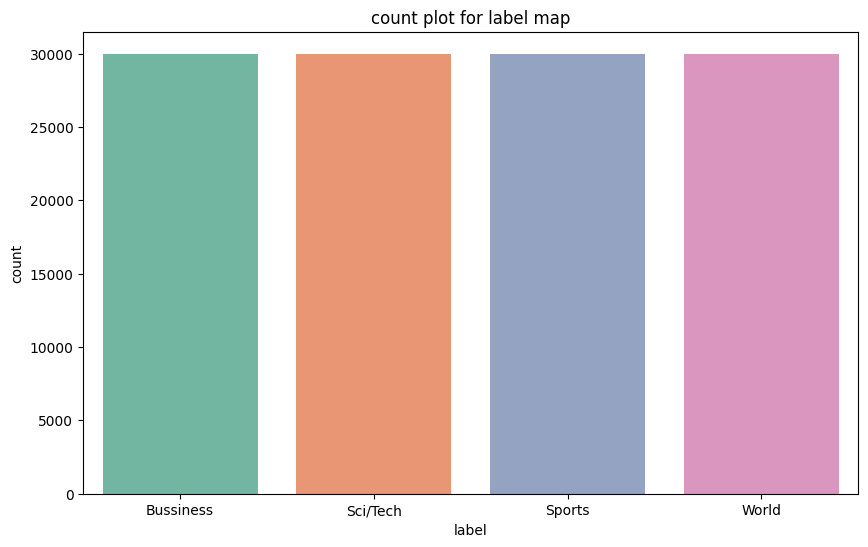

In [ ]:
# ploting countplot for label map column (count map shows how many numbers in each in label_map)
plt.figure(figsize=(10,6))
sns.countplot(x='label_map',data=df_train,palette='Set2')
plt.title("count plot for label map")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

# text cleaning

In [ ]:
# removing unwanted symbols and etc in text 
import re , string#re என்றால் regular expression library.இது text-ல இருந்து word, number, symbol remove பண்ண அல்லது pattern கண்டுபிடிக்க உதவும்.
def clean_text(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text= re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [ ]:
df_train[["text"]]

,text
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."
...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...
119996,Renteria signing a top-shelf deal Red Sox gene...
119997,Saban not going to Dolphins yet The Miami Dolp...
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [ ]:
# cleaning text in train dataset
df_train["text"]=df_train["text"].apply(clean_text)# appling  clean_text to df_train textcolumn உன் dataset-ல் "text" column-இல் உள்ள வாக்கியங்களில் இருக்கும் unwanted symbols, emojis, punctuation marks, extra spaces, numbers, URLs, போன்றவற்றை நீக்கி
df_train

,text,label,label_map
0,wall st bears claw back into the black reuters...,2,Bussiness
1,carlyle looks toward commercial aerospace reut...,2,Bussiness
2,oil and economy cloud stocks outlook reuters r...,2,Bussiness
3,iraq halts oil exports from main southern pipe...,2,Bussiness
4,oil prices soar to alltime record posing new m...,2,Bussiness
...,...,...,...
119995,pakistans musharraf says wont quit as army chi...,0,World
119996,renteria signing a topshelf deal red sox gener...,1,Sports
119997,saban not going to dolphins yet the miami dolp...,1,Sports
119998,todays nfl games pittsburgh at ny giants time ...,1,Sports


#  word tokenize

In [ ]:
# Tokenization --> df_train["text"] 
import nltk #nltk →  natuiral language toolkit 
nltk.download('punkt_tab') #nltk
from nltk import word_tokenize #word_tokenize()  
df_train["text"] = df_train["text"].apply(word_tokenize) #apply() → DataFrame-

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,label_map
0,"[wall, st, bears, claw, back, into, the, black...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, and, economy, cloud, stocks, outlook, re...",2,Bussiness
3,"[iraq, halts, oil, exports, from, main, southe...",2,Bussiness
4,"[oil, prices, soar, to, alltime, record, posin...",2,Bussiness


# stopwords  removal


In [ ]:
! pip install nltk
# it has no significant meaning.can remove from data ## example: the,is,in,a,on this all removed in data


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stop_words(text):#text → ஒரு list of words, : ["this", "is", "a", "good", "day"]words → 
    stop_words=set(stopwords.words("english"))#stopwords.words("english") 
    text=[words for words in text if words not in stop_words]
    return text


In [ ]:
df_train["text"] = df_train["text"].apply(stop_words)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Bussiness
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Bussiness
4,"[oil, prices, soar, alltime, record, posing, n...",2,Bussiness


In [ ]:
df_train

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Bussiness
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Bussiness
4,"[oil, prices, soar, alltime, record, posing, n...",2,Bussiness
...,...,...,...
119995,"[pakistans, musharraf, says, wont, quit, army,...",0,World
119996,"[renteria, signing, topshelf, deal, red, sox, ...",1,Sports
119997,"[saban, going, dolphins, yet, miami, dolphins,...",1,Sports
119998,"[todays, nfl, games, pittsburgh, ny, giants, t...",1,Sports


# Lemmentization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Santhosh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemma(text):
  lemma_stem =WordNetLemmatizer()
  text = " ".join(lemma_stem.lemmatize(words) for words in text)
  return text

In [ ]:
df_train["text"] = df_train["text"].apply(lemma)
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Bussiness
1,carlyle look toward commercial aerospace reute...,2,Bussiness
2,oil economy cloud stock outlook reuters reuter...,2,Bussiness
3,iraq halt oil export main southern pipeline re...,2,Bussiness
4,oil price soar alltime record posing new menac...,2,Bussiness


# Vectorization

In [ ]:
x = df_train["text"]
y = df_train["label"]

In [ ]:
x

0         wall st bear claw back black reuters reuters s...
1         carlyle look toward commercial aerospace reute...
2         oil economy cloud stock outlook reuters reuter...
3         iraq halt oil export main southern pipeline re...
4         oil price soar alltime record posing new menac...
                                ...                        
119995    pakistan musharraf say wont quit army chief ka...
119996    renteria signing topshelf deal red sox general...
119997    saban going dolphin yet miami dolphin put cour...
119998    today nfl game pittsburgh ny giant time pm lin...
119999    net get carter raptor indianapolis allstar vin...
Name: text, Length: 120000, dtype: object

In [ ]:
y

0         2
1         2
2         2
3         2
4         2
         ..
119995    0
119996    1
119997    1
119998    1
119999    1
Name: label, Length: 120000, dtype: int64

In [ ]:
# Splitting dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train

84145     bill mcgahee hit pause run fast forward wind g...
60838     eli lilly eliminating job indianapolisbased dr...
99429     crime top queen speech agenda new measure figh...
26258     bloomberg face payoff year school plan new yor...
12165     timeline case kobe bryant ap ap timeline sexua...
                                ...                        
110268    genome fowl researcher sequenced genome red ju...
119879    governor want fine selling violent game kid il...
103694    russian finish dominant federation cup victory...
860       oracle ready crm update oracle corp plan relea...
15795     apple new imac display apple computer quote ch...
Name: text, Length: 90000, dtype: object

In [ ]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (90000,)
x_test: (30000,)


In [ ]:
# Vectorization — (Text → Numbers)  
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# saving vectorized pkl

In [ ]:
import pickle
# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Model building

# Randomforestclassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1)
rf.fit(x_train_tfidf,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Pediction on test data
y_pred_rf=rf.predict(x_test_tfidf)
y_pred_rf

array([2, 2, 1, ..., 2, 1, 3], shape=(30000,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Confusion Matrix:\n", cm_rf)
train_score = rf.score(x_train_tfidf, y_train)
test_score = rf.score(x_test_tfidf, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Confusion Matrix:
 [[6664  290  323  195]
 [ 104 7336   66   54]
 [ 294  114 6346  686]
 [ 317  176  693 6342]]
Train Score: 0.9995111111111111
Test Score: 0.8896


In [ ]:
# Dataframing
rf_results = pd.DataFrame({
    "Model": ["RandomForestClassifier"],
    "Accuracy": [acc_rf],
    "Precision(avg)": [report_rf["weighted avg"]["precision"]],
    "Recall(avg)": [report_rf["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_rf["weighted avg"]["f1-score"]]
})
rf_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,RandomForestClassifier,0.8896,0.889036,0.8896,0.889121


# Navie bias

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
# Prediction on test dataset
y_pred_nb = nb.predict(x_test_tfidf)
y_pred_nb 

array([2, 2, 1, ..., 2, 1, 0], shape=(30000,))

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Confusion Matrix:
 [[6689  275  353  155]
 [  83 7402   44   31]
 [ 240   73 6529  598]
 [ 301   63  638 6526]]


In [ ]:
nb_results = pd.DataFrame({
    "Model": ["MultinomialNB"],
    "Accuracy": [acc_nb],
    "Precision(avg)": [report_nb["weighted avg"]["precision"]],
    "Recall(avg)": [report_nb["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_nb["weighted avg"]["f1-score"]]
})
nb_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,MultinomialNB,0.904867,0.904644,0.904867,0.904601


# XGBclassifier

In [ ]:
# model training
from xgboost import XGBClassifier
model_xgb = XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model_xgb.fit(x_train_tfidf, y_train)


In [ ]:
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Bussiness
1,carlyle look toward commercial aerospace reute...,2,Bussiness
2,oil economy cloud stock outlook reuters reuter...,2,Bussiness
3,iraq halt oil export main southern pipeline re...,2,Bussiness
4,oil price soar alltime record posing new menac...,2,Bussiness


In [ ]:
# prediction on test dataset
y_pred_xgb = model_xgb.predict(x_test_tfidf)
y_pred_xgb

array([2, 2, 1, ..., 2, 1, 3], shape=(30000,))

In [ ]:
# evatuation 
acc_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
print(" Confusion Matrix:\n", cm_xgb)

 Confusion Matrix:
 [[6600  308  298  266]
 [ 120 7199   95  146]
 [ 266   95 6410  669]
 [ 278  185  640 6425]]


In [ ]:
# Store in DataFrame (like RandomForest format)
xgb_results = pd.DataFrame({
    "Model": ["XGBoostClassifier"],
    "Accuracy": [acc_xgb],
    "Precision(avg)": [report_xgb["weighted avg"]["precision"]],
    "Recall(avg)": [report_xgb["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_xgb["weighted avg"]["f1-score"]]
})
xgb_results

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,XGBoostClassifier,0.8878,0.887646,0.8878,0.887626


# LSTM

In [ ]:
# splitting dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 2, random_state = 10)

In [ ]:
# Tokeization
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(xtrain)
sequences = tokenizer.texts_to_sequences(xtrain)

In [ ]:
# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, padding='post', maxlen=10)

In [ ]:
# model building
model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=10),
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(10, 5)),  
    LSTM(30, activation='tanh'), 
    Dense(10, activation='sigmoid')  
])
model.compile(optimizer= 'adam',
               loss='binary_crossentropy',
               metrics=['accuracy', 'mae'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Labelencoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_e = label_encoder.transform(ytrain)
y_test_e = label_encoder.transform(ytest)

In [ ]:
y_train_encoded = to_categorical(y_train_e, num_classes=10)

In [ ]:
history = model.fit(padded_sequences, 
                    y_train_encoded,
                    epochs=5)


Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6424 - loss: 0.1443 - mae: 0.0935
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7915 - loss: 0.1000 - mae: 0.0599
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7957 - loss: 0.0975 - mae: 0.0583
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.8014 - loss: 0.0949 - mae: 0.0567
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8066 - loss: 0.0926 - mae: 0.0554


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20 non-null     object
dtypes: object(1)
memory usage: 292.0+ bytes


In [ ]:
# Convert test texts to sequences
X_test_seq = tokenizer.texts_to_sequences(xtest)

# Pad the sequences to match input length used in training
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=10)

# Prediction on the entire test data
y_pred_probs = model.predict(X_test_pad)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute metrics
acc_lstm = accuracy_score(y_test_e, y_pred_classes)
cm_lstm = confusion_matrix(y_test_e, y_pred_classes)
report_lstm = classification_report(y_test_e, y_pred_classes, output_dict=True)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


In [ ]:
# Save neatly in DataFrame
lstm_results = pd.DataFrame({
    "Model": ["LSTM"],
    "Accuracy": [acc_lstm],
    "Precision(avg)": [report_lstm["weighted avg"]["precision"]],
    "Recall(avg)": [report_lstm["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_lstm["weighted avg"]["f1-score"]]
})

# Display results
print("\n LSTM Model Performance:")
a =pd.DataFrame(lstm_results)
a


 LSTM Model Performance:


,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,LSTM,0.5,0.5,0.5,0.5


In [ ]:
# Concating
best_model_df = pd.concat([rf_results,nb_results,xgb_results,a], ignore_index=True)
best_model_df

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,RandomForestClassifier,0.889600,0.889036,0.889600,0.889121
1,MultinomialNB,0.904867,0.904644,0.904867,0.904601
2,XGBoostClassifier,0.887800,0.887646,0.887800,0.887626
3,LSTM,0.500000,0.500000,0.500000,0.500000


# storing to file path

In [ ]:
import os 
os.getcwd()

'c:\\Users\\Santhosh\\OneDrive\\Desktop\\python_class\\deeplearning\\Project4'

In [ ]:
path = r"C:\Users\Santhosh\OneDrive\Desktop\python_class\deeplearning\archive (8)\best_model.csv"
best_model_df.to_csv("best_model.csv", index=False)

In [ ]:
# Find index of the best model based on Accuracy
best_index = best_model_df['Accuracy'].idxmax()
# Take that best model row
best_model = best_model_df.loc[best_index]
# Show best model details
print("\nBest model with highest Accuracy:")
print(best_model)



Best model with highest Accuracy:
Model             MultinomialNB
Accuracy               0.904867
Precision(avg)         0.904644
Recall(avg)            0.904867
F1-Score(avg)          0.904601
Name: 1, dtype: object


# Hyperparameter tunning-->(RandomizedSearchCV)

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}
grid_nb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=param_grid_nb,
    n_iter=10,        # number of random combinations
    cv=5,             # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Best hyperparameters
# Now this will work
print("Best Parameters:", grid_nb.best_params_)
print("Best Score:", grid_nb.best_score_)

Best Parameters: {'fit_prior': False, 'alpha': 0.1}
Best Score: 0.9067777777777778


In [ ]:
# Get the best Naive Bayes model
best_nb_model = grid_nb.best_estimator_
best_nb_model


,alpha,0.1
,force_alpha,True
,fit_prior,False
,class_prior,None


# remodel building

In [ ]:
# MultinomialNB
final_nb_model = MultinomialNB(
    alpha=0.1,
    fit_prior=False
)

In [ ]:
final_nb_model.fit(x_train_tfidf, y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,False
,class_prior,None


In [ ]:
# Predict on test data
y_pred_final = final_nb_model.predict(x_test_tfidf)

In [ ]:
# Evaluate
acc_final = accuracy_score(y_test, y_pred_final)
cm_final = confusion_matrix(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)
print("accuracy_score:\n", acc_final)
print("confusion_matrix:\n", cm_final)
print("classification_repor:\n", report_final)
# Correct scoring using TF-IDF features
print(f"Train Score: {final_nb_model.score(x_train_tfidf, y_train)}")
print(f"Test Score: {final_nb_model.score(x_test_tfidf, y_test)}")

accuracy_score:
 0.9062666666666667
confusion_matrix:
 [[6677  268  356  171]
 [  74 7412   41   33]
 [ 246   68 6489  637]
 [ 261   52  605 6610]]
classification_repor:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      7472
           1       0.95      0.98      0.97      7560
           2       0.87      0.87      0.87      7440
           3       0.89      0.88      0.88      7528

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000

Train Score: 0.9350777777777778
Test Score: 0.9062666666666667


In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate
acc_final = accuracy_score(y_test, y_pred_final)
cm_final = confusion_matrix(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final, output_dict=True)  # <-- important

# Store in DataFrame
nb_results_tuned = pd.DataFrame({
    "Model": ["Tuned MultinomialNB"],
    "Accuracy": [acc_final],
    "Precision(avg)": [report_final["weighted avg"]["precision"]],
    "Recall(avg)": [report_final["weighted avg"]["recall"]],
    "F1-Score(avg)": [report_final["weighted avg"]["f1-score"]]
})


b = pd.DataFrame(nb_results_tuned)
b

,Model,Accuracy,Precision(avg),Recall(avg),F1-Score(avg)
0,Tuned MultinomialNB,0.906267,0.906031,0.906267,0.906034


In [ ]:
# Merge all model results
best_model_df = pd.concat([rf_results, nb_results_tuned, xgb_results, lstm_results], ignore_index=True)
# Display
print(best_model_df)
# Find the best model based on Accuracy
best_index = best_model_df['Accuracy'].idxmax()
best_model = best_model_df.loc[best_index]
print("\nBest model overall:")
print(best_model)


                    Model  Accuracy  Precision(avg)  Recall(avg)  \
0  RandomForestClassifier  0.889600        0.889036     0.889600   
1     Tuned MultinomialNB  0.906267        0.906031     0.906267   
2       XGBoostClassifier  0.887800        0.887646     0.887800   
3                    LSTM  0.500000        0.500000     0.500000   

   F1-Score(avg)  
0       0.889121  
1       0.906034  
2       0.887626  
3       0.500000  

Best model overall:
Model             Tuned MultinomialNB
Accuracy                     0.906267
Precision(avg)               0.906031
Recall(avg)                  0.906267
F1-Score(avg)                0.906034
Name: 1, dtype: object


# saving final_nb_model as pkl

In [ ]:

import pickle
# model save
with open("nb_model.pkl","wb") as file:
  pickle.dump(final_nb_model,file)

# saving tfidf as pkl

In [ ]:
# vector save
with open("tfidf.pkl","wb") as file:
  pickle.dump(tfidf,file)

# Reading nb_model pkl 

In [ ]:
with open("nb_model.pkl","rb") as file:
  model = pickle.load(file)

# Reading tfidf pkl 

In [ ]:
with open("tfidf.pkl","rb") as file:
  vector = pickle.load(file)

# Text prediction finally

In [ ]:
text = ["Apple launches new iPhone with advanced features"]
new_text_tfidf = vector.transform(text)
prediction = model.predict(new_text_tfidf)

In [ ]:
if prediction[0]==0:
  print("It is world news")
elif prediction[0]==1:
  print("It is sports news")
elif prediction[0]==2:
  print("It is business news")
else:
  print("It is science and technology news")

It is science and technology news


# new prediction test Dataset 

In [ ]:
test_data = vector.transform(df_test["text"])
pred = model.predict(test_data)

In [ ]:
df_test["label"] = pred
df_test.head()

,text,label
0,Three quarters of financial firms still conduc...,3
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2
3,Why food discount stickers may be a thing of t...,2
4,German cabinet tries to solve ‘no-debt’ crisis...,0


In [ ]:
# save model in csv
df_test.to_csv("test_data_prediction.csv",index=False)

In [ ]:
category_mapping = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}
df_test["category"] = df_test["label"].map(category_mapping)
df_test.to_csv("test_data_prediction_final.csv", index=False)
df_test.head()


,text,label,category
0,Three quarters of financial firms still conduc...,3,Sci/Tech
1,European stocks rally on hope ECB may be done ...,2,Business
2,"Gold prices have hit a new high, while the val...",2,Business
3,Why food discount stickers may be a thing of t...,2,Business
4,German cabinet tries to solve ‘no-debt’ crisis...,0,World


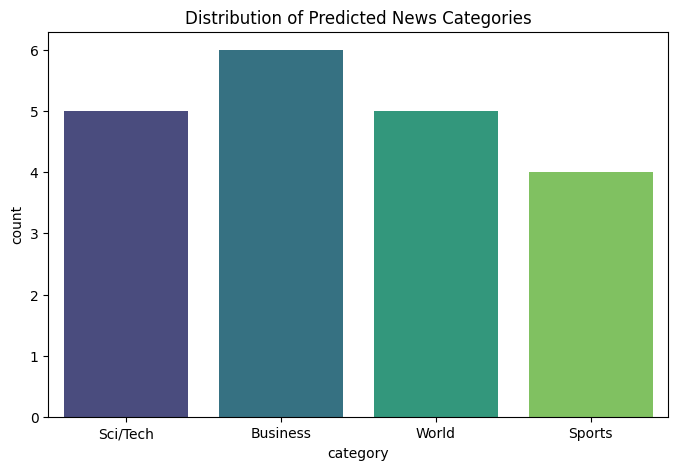

In [ ]:
# Countplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(x="category", data=df_test, palette="viridis")
plt.title("Distribution of Predicted News Categories")
plt.show()
